# Query for icSrc Sources Results for Holograms in  OGA

 work with Weakly_2023_01
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/02/03
- update : 2023/02/03


In [1]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/home/d/dagoret/repos/repos_w_2023_01/atmospec 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-5.1.0/eups 	setup
spectractor           LOCAL:/home/d/dagoret/repos/repos_w_2023_01/Spectractor 	setup


In [2]:
! eups list -s lsst_distrib

   g754a7f0350+935911ccad 	current w_2023_01 setup


In [3]:
import lsst.daf.butler as dafButler
#import lsst.summit.utils.butlerUtils as butlerUtils

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm,SymLogNorm


import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch

from astropy.io import fits

import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [5]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch


In [6]:
# LSST Display
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

In [7]:
transform = AsinhStretch() + PercentileInterval(99.)

In [8]:
#repo =  "/sdf/group/rubin/repo/main"
repo = "/sdf/group/rubin/repo/oga/"
butler = dafButler.Butler(repo)
registry = butler.registry

## Give the collection

In [9]:
#my_collection = "u/dagoret/BPS_test"
#my_collection = "u/dagoret/BPS_photimaging_202301"


#my_collection = "u/dagoret/BPS_manyspectro_v7" # january 20th 2023 (2023/01/17)
#my_collection = "u/dagoret/BPS_manyspectro_v8" # january 23th 2023 (2023/01/18)
#my_collection = "u/dagoret/BPS_manyspectro_v9" # january 23th 2023 (2023/01/19)
#my_collection = "u/dagoret/BPS_manyspectro_v10" # january 27th 2023 (2023/01/18), output with the _b, rebin=2
#my_collection = "u/dagoret/BPS_manyspectro_v11" # january 26th 2023 (2023/01/17), output with the _b, rebin=2
#my_collection = "u/dagoret/BPS_manyspectro_v12" # january 26th 2023 (2023/01/19), output with the _b, rebin=2,
#my_collection = "u/dagoret/BPS_manyspectro_v13" # january 31th 2023 (2023/01/18), rebin=1,
#my_collection = "u/dagoret/BPS_manyspectro_v14" # january 31th 2023 (2023/01/17), rebin=1,
my_collection = "u/dagoret/BPS_manyspectro_v15" # january 31th 2023 (2023/01/18), rebin=1,
#my_collection = "u/dagoret/BPS_manyspectro_v16" # february 1st 2023 (2023/02/03), rebin=1,

In [10]:
#butler = butlerUtils.makeDefaultLatissButler(extraCollections=[my_collection])

## Config

In [11]:
# path index for each month
#DATE="20211103"
#filterdispersername = "empty~holo4_003"
#filterdispersername = "BG40~holo4_003"
#filterdispersername = "FELH0600~holo4_003"

- icSrc_schema
- icExp  
- icExpBackground  
- icSrc

In [12]:
datasetRefs = registry.queryDatasets(datasetType='icSrc_schema', collections=my_collection, where= "instrument='LATISS'")
#icSrc_schema = butler.get('icSrc_schema')

## icExp

In [13]:
datasetRefs = registry.queryDatasets(datasetType='icExp', collections=my_collection, where= "instrument='LATISS'")

In [14]:
all_ref_for_icSrc = []
all_dataId = []
all_icExp  = []
all_exposures = []



for i, ref in enumerate(datasetRefs):
    all_ref_for_icSrc.append(ref.dataId)
    print("========================datasetType = icExp ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    icExp = butler.get('icExp', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_icExp.append(icExp)
    if i > 5:
        break

========================datasetType = icExp ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2023011900306}
visit...................: 2023011900306
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/BPS_manyspectro_v15/20230130T220742Z
{'day_obs': 20230119, 'seq_num': 306, 'detector': 0}
========================datasetType = icExp ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2023011900402}
visit...................: 2023011900402
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/BPS_manyspectro_v15/20230130T220742Z
{'day_obs': 20230119, 'seq_num': 402, 'detector': 0}
========================datasetType = icExp ============================

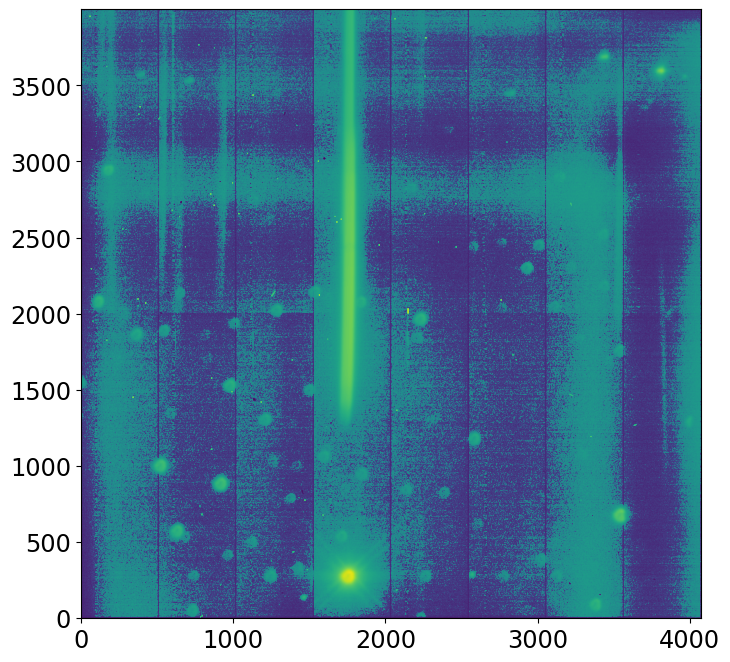

In [15]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
#linthresh, linscale=1.0, vmin=None, vmax=None, clip=False, *, base=10
ax.imshow(icExp.getImage().array,origin="lower",norm=SymLogNorm(linthresh=1))

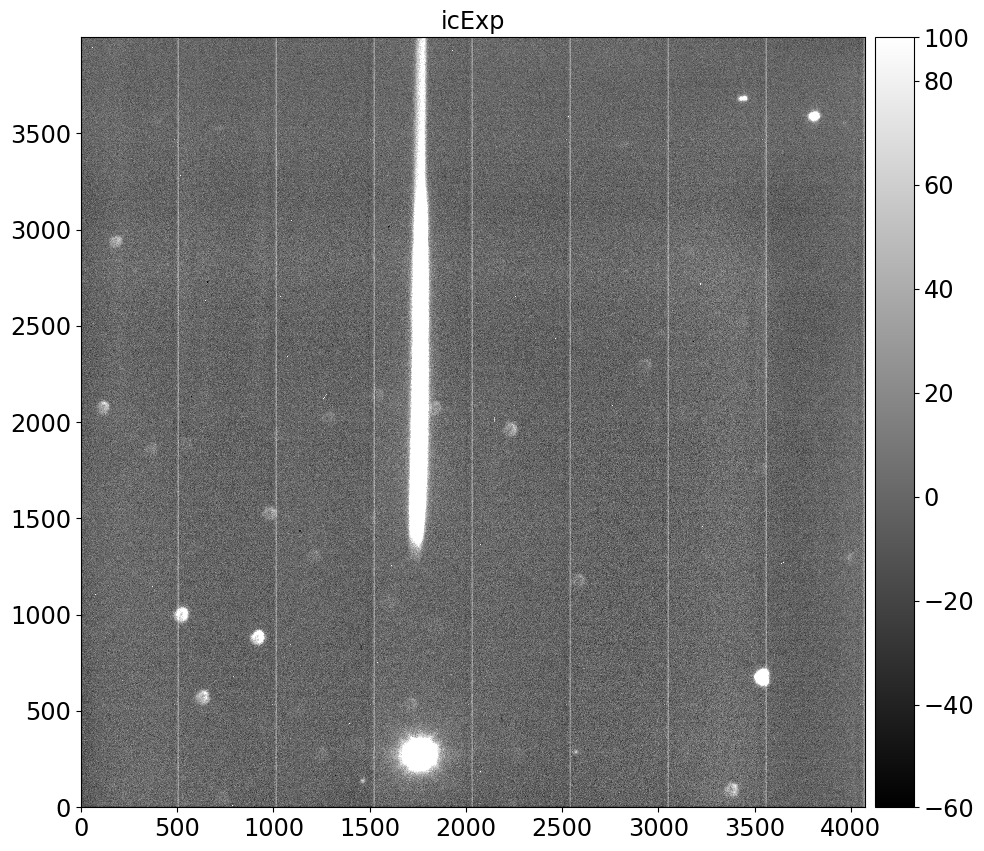

In [16]:
fig = plt.figure(figsize=(12,10))
afw_display = afwDisplay.Display(frame=fig)
afw_display.scale('linear', 'zscale',None)
the_title = f"icExp"
afw_display.mtv(icExp.getImage(),title=the_title)

## icExpBackground

In [17]:
datasetRefs = registry.queryDatasets(datasetType='icExpBackground', collections=my_collection, where= "instrument='LATISS'")

In [18]:
all_ref_for_icExpBg  = []
all_dataId = []
all_icExpBg  = []
all_exposures = []



for i, ref in enumerate(datasetRefs):
    all_ref_for_icSrc.append(ref.dataId)
    print("========================datasetType = icExpBackground ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    icExpBg = butler.get('icExpBackground', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_icExpBg.append(icExpBg) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_icExpBg.append(icExpBg)
    if i > 5:
        break

========================datasetType = icExpBackground ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2023011900392}
visit...................: 2023011900392
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/BPS_manyspectro_v15/20230130T220742Z
{'day_obs': 20230119, 'seq_num': 392, 'detector': 0}
========================datasetType = icExpBackground ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2023011900354}
visit...................: 2023011900354
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/BPS_manyspectro_v15/20230130T220742Z
{'day_obs': 20230119, 'seq_num': 354, 'detector': 0}
========================datasetType = icExpBackgroun

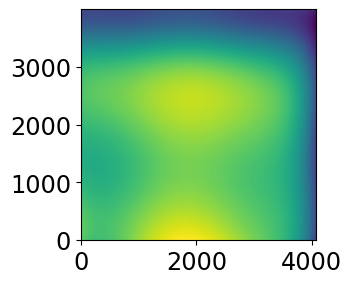

In [19]:
plt.imshow(icExpBg.getImage().array,origin="lower")

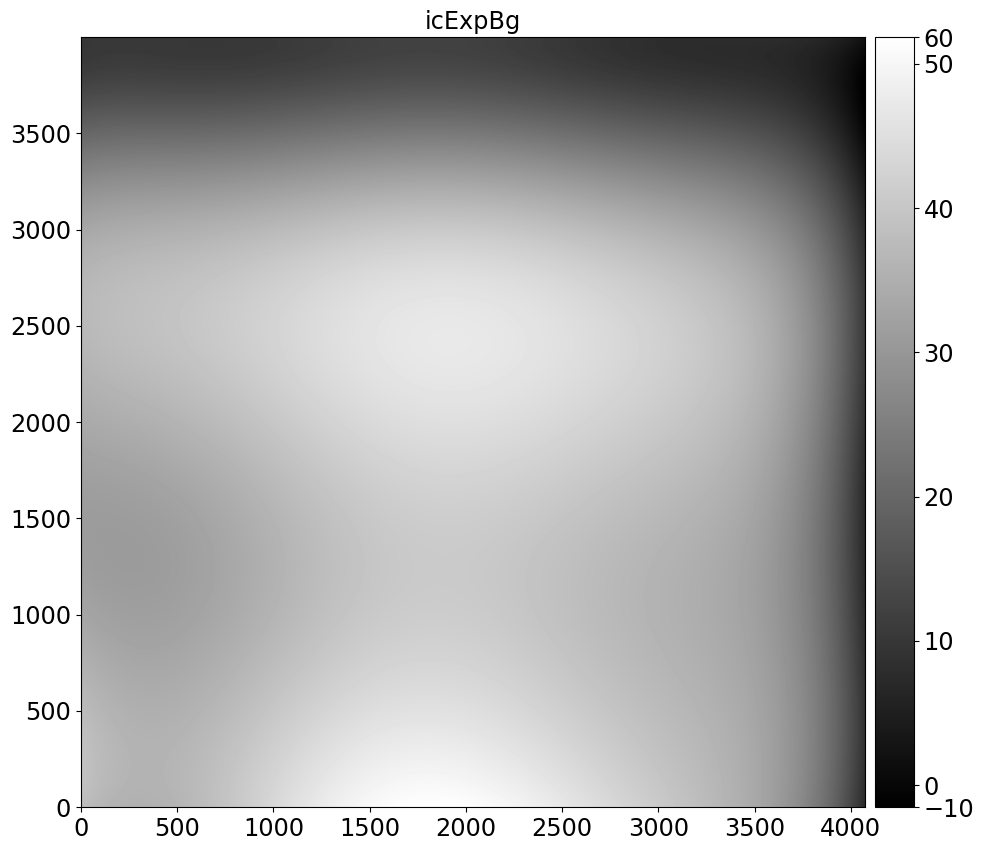

In [20]:
fig = plt.figure(figsize=(12,10))
afw_display = afwDisplay.Display(frame=fig)
afw_display.scale('linear', 'zscale',None)
the_title = f"icExpBg"
afw_display.mtv(icExpBg.getImage(),title=the_title)

## icSrc

In [21]:
datasetRefs = registry.queryDatasets(datasetType='icSrc', collections=my_collection, where= "instrument='LATISS'")

In [22]:
datasetRefs.any() 

True

In [23]:
all_ref_for_icSrc = []
all_dataId = []
all_icSrc = []
all_exposures = []



for i, ref in enumerate(datasetRefs):
    all_ref_for_icSrc.append(ref.dataId)
    print("========================datasetType = icSrc ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    icSrc = butler.get('icSrc', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_icSrc.append(icSrc) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_icSrc.append(icSrc)
    

========================datasetType = icSrc ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2023011900306}
visit...................: 2023011900306
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/BPS_manyspectro_v15/20230130T220742Z
{'day_obs': 20230119, 'seq_num': 306, 'detector': 0}
========================datasetType = icSrc ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2023011900401}
visit...................: 2023011900401
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/BPS_manyspectro_v15/20230130T220742Z
{'day_obs': 20230119, 'seq_num': 401, 'detector': 0}
========================datasetType = icSrc ============================

In [24]:
table_sources = icSrc.asAstropy()
table_sources

id,coord_ra,coord_dec,parent,calib_psf_candidate,calib_psf_used,calib_psf_reserved,base_SdssCentroid_x,slot_Centroid_x,base_SdssCentroid_y,slot_Centroid_y,base_SdssCentroid_xErr,slot_Centroid_xErr,base_SdssCentroid_yErr,slot_Centroid_yErr,base_SdssCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianFlux_flag_badCentroid,base_PsfFlux_flag_badCentroid,ext_shapeHSM_HsmSourceMoments_flag_badCentroid,slot_Centroid_flag,base_SdssCentroid_flag_edge,base_CircularApertureFlux_flag_badCentroid_edge,base_GaussianFlux_flag_badCentroid_edge,base_PsfFlux_flag_badCentroid_edge,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_edge,slot_Centroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_CircularApertureFlux_flag_badCentroid_noSecondDerivative,base_GaussianFlux_flag_badCentroid_noSecondDerivative,base_PsfFlux_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_noSecondDerivative,slot_Centroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_CircularApertureFlux_flag_badCentroid_almostNoSecondDerivative,base_GaussianFlux_flag_badCentroid_almostNoSecondDerivative,base_PsfFlux_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_almostNoSecondDerivative,slot_Centroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_CircularApertureFlux_flag_badCentroid_notAtMaximum,base_GaussianFlux_flag_badCentroid_notAtMaximum,base_PsfFlux_flag_badCentroid_notAtMaximum,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_notAtMaximum,slot_Centroid_flag_notAtMaximum,base_SdssCentroid_flag_resetToPeak,base_CircularApertureFlux_flag_badCentroid_resetToPeak,base_GaussianFlux_flag_badCentroid_resetToPeak,base_PsfFlux_flag_badCentroid_resetToPeak,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_resetToPeak,slot_Centroid_flag_resetToPeak,base_SdssCentroid_flag_badError,base_CircularApertureFlux_flag_badCentroid_badError,base_GaussianFlux_flag_badCentroid_badError,base_PsfFlux_flag_badCentroid_badError,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_badError,slot_Centroid_flag_badError,base_FPPosition_x,base_FPPosition_y,base_FPPosition_flag,base_FPPosition_missingDetector_flag,base_Jacobian_value,base_Jacobian_flag,ext_shapeHSM_HsmSourceMoments_x,slot_Shape_x,ext_shapeHSM_HsmSourceMoments_y,slot_Shape_y,ext_shapeHSM_HsmSourceMoments_xx,slot_Shape_xx,ext_shapeHSM_HsmSourceMoments_yy,slot_Shape_yy,ext_shapeHSM_HsmSourceMoments_xy,slot_Shape_xy,ext_shapeHSM_HsmSourceMoments_flag,base_GaussianFlux_flag_badShape,slot_Shape_flag,ext_shapeHSM_HsmSourceMoments_flag_no_pixels,base_GaussianFlux_flag_badShape_no_pixels,slot_Shape_flag_no_pixels,ext_shapeHSM_HsmSourceMoments_flag_not_contained,base_GaussianFlux_flag_badShape_not_contained,slot_Shape_flag_not_contained,ext_shapeHSM_HsmSourceMoments_flag_parent_source,base_GaussianFlux_flag_badShape_parent_source,slot_Shape_flag_parent_source,ext_shapeHSM_HsmSourceMoments_flag_galsim,base_GaussianFlux_flag_badShape_galsim,slot_Shape_flag_galsim,ext_shapeHSM_HsmSourceMoments_flag_edge,base_GaussianFlux_flag_badShape_edge,slot_Shape_flag_edge,base_CircularApertureFlux_3_0_instFlux,base_CircularApertureFlux_3_0_instFluxErr,base_CircularApertureFlux_3_0_flag,base_CircularApertureFlux_3_0_flag_apertureTruncated,base_CircularApertureFlux_3_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_4_5_instFlux,base_CircularApertureFlux_4_5_instFluxErr,base_CircularApertureFlux_4_5_flag,base_CircularApertureFlux_4_5_flag_apertureTruncated,base_CircularApertureFlux_4_5_flag_sincCoeffsTruncated,base_CircularApertureFlux_6_0_instFlux,base_CircularApertureFlux_6_0_instFluxErr,base_CircularApertureFlux_6_0_flag,base_CircularApertureFlux_6_0_flag_apertureTruncated,base_CircularApertureFlux_6_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_9_0_instFlux,base_CircularApertureFlux_9_0_instFluxErr,base_CircularApertureFlux_9_0_flag,base_CircularApertureFlux_9_0_flag_apertureTruncated,base_CircularApertureFlux_9_0_f